In [43]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Hibamértékek

In [17]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
xv, yv = np.meshgrid(x, y, sparse=False, indexing='ij')

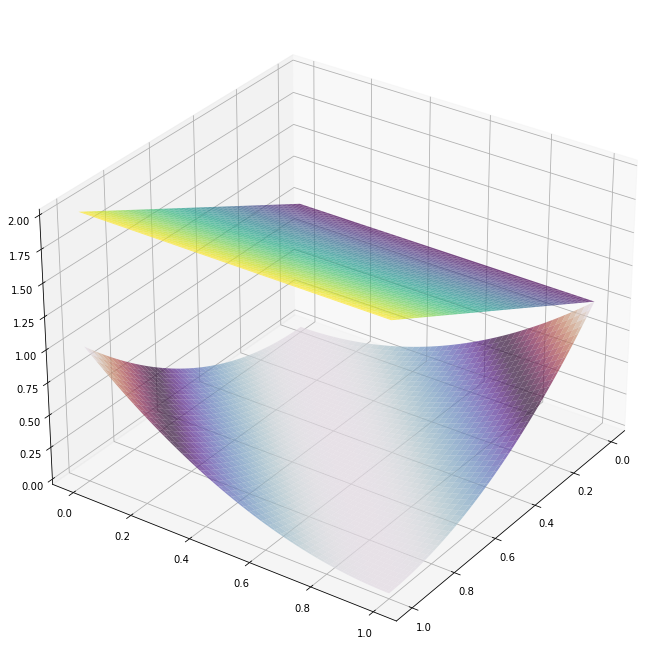

In [31]:
def mse(X,Y):
    return (X-Y)**2

def hinge(X, Y):
    return np.maximum(1 + 1 * X, 1 - 1 * Y)


fig = plt.figure(figsize=(16,12))
ax = plt.axes(projection='3d')
ax.view_init(30, 35)
Z_mse = mse(xv,yv)
Z_hinge = hinge(xv, yv)
ax.plot_surface(xv,yv, Z_mse, cmap='twilight', edgecolor='none', alpha=0.7)
ax.plot_surface(xv,yv, Z_hinge, cmap='viridis', edgecolor='none', alpha=0.7)

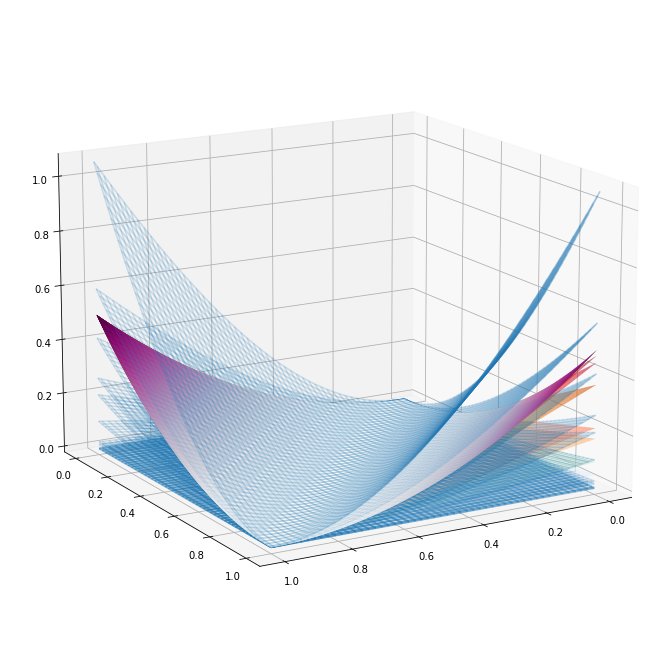

In [57]:
def huber(X, Y, delta):
    return np.where(Y - X <= delta, (Y-X)**2/2, delta*(abs(Y-X)-delta/2))

def huber_approx(X, Y, delta):
    return delta**2*(np.sqrt(1+(Y-X)**2) - 1)


fig = plt.figure(figsize=(16,12))
ax = plt.axes(projection='3d')
ax.view_init(15, 60)

from collections import OrderedDict

cmaps = OrderedDict()

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']



for i, delta in enumerate([0.005, 0.01, 0.05, 0.1, 0.2, 0.25, 0.5, 0.7, 0.8, 1.0, 1.2, 1.6]):
    Z_huber = huber(xv, yv, delta)
    ax.plot_surface(xv,yv, Z_huber, cmap=cmaps['Sequential'][i], edgecolor='none', alpha=0.6, label=str(delta))
    

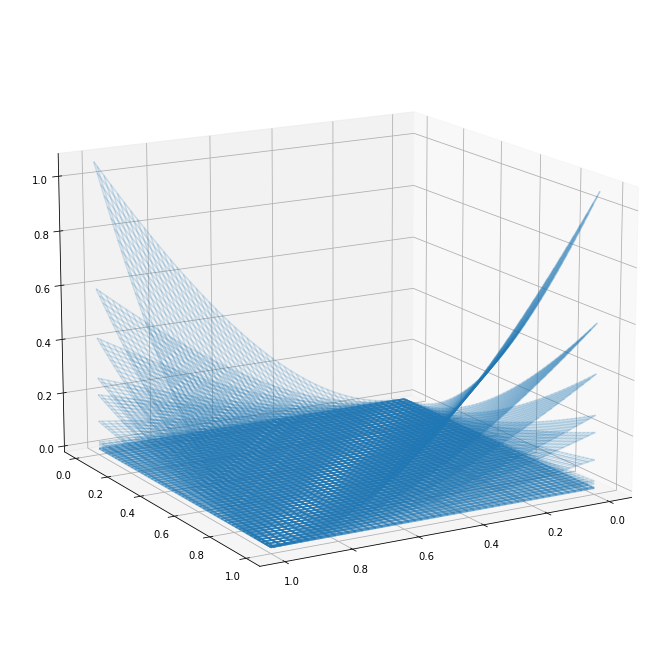

In [61]:
cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']
fig = plt.figure(figsize=(16,12))
ax = plt.axes(projection='3d')
ax.view_init(15, 60)
for i, delta in enumerate([0.005, 0.01, 0.05, 0.1, 0.2, 0.25, 0.5, 0.7, 0.8, 1.0, 1.2, 1.6]):    
    Z_huber_approx = huber_approx(xv, yv, delta)
    ax.plot_wireframe(xv, yv, Z_huber_approx, cmap=cmaps['Sequential (2)'][i], alpha=0.2)
    

# Likelihood maximalizálás és keresztentrópia minimalizálás

In [69]:
x = np.linspace(1e-3, 1, 100)
y = np.linspace(1e-3, 1, 100)
xv, yv = np.meshgrid(x, y, sparse=False, indexing='ij')

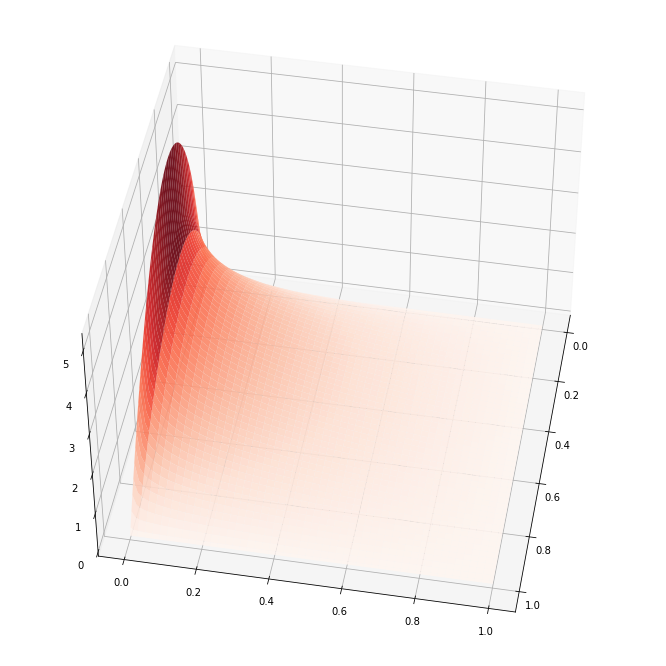

In [77]:
def entropy(X):
    return -X*np.log2(X)

def cross_entropy(X, Y):
    return - entropy(X) * np.log2(Y)

Z_cross = cross_entropy(xv, yv)
fig = plt.figure(figsize=(16,12))
ax = plt.axes(projection='3d')
ax.view_init(45, 10)
ax.plot_surface(xv,yv, Z_cross, cmap=cmaps['Sequential'][5], edgecolor='none', alpha=0.9, label=str(delta))

# Aktivációs függvények

In [2]:
t = np.linspace(-1.5, 1.5, 100)

In [3]:
def step(t):
    if t > 0:
        return 1
    else:
        return 0

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

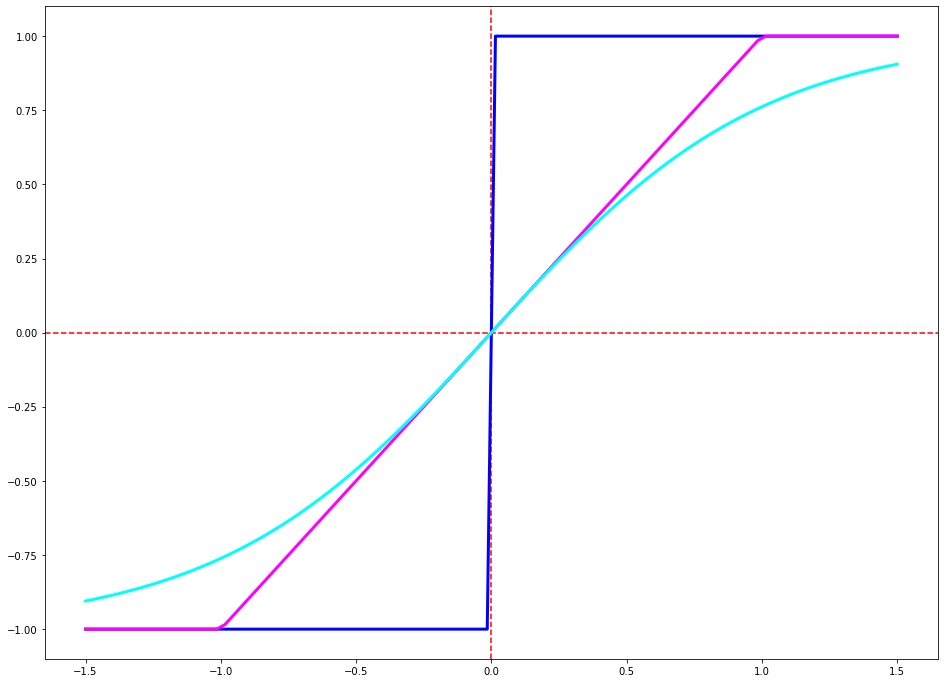

In [90]:
step_t = np.where(t > 0, 1, -1)
lu_t = np.where(t > 1, 1, np.where(t <= -1, -1, t))
tanh_t = np.tanh(t)
fig = plt.figure(figsize=(16,12))
plt.axhline(y=0, linestyle='--', color="red")
plt.axvline(x=0, linestyle='--', color="red")
plt.plot(t, step_t, color="blue", linewidth=3)
plt.plot(t, lu_t, color="magenta",  linewidth=3)
plt.plot(t, tanh_t, color="cyan",  linewidth=3)


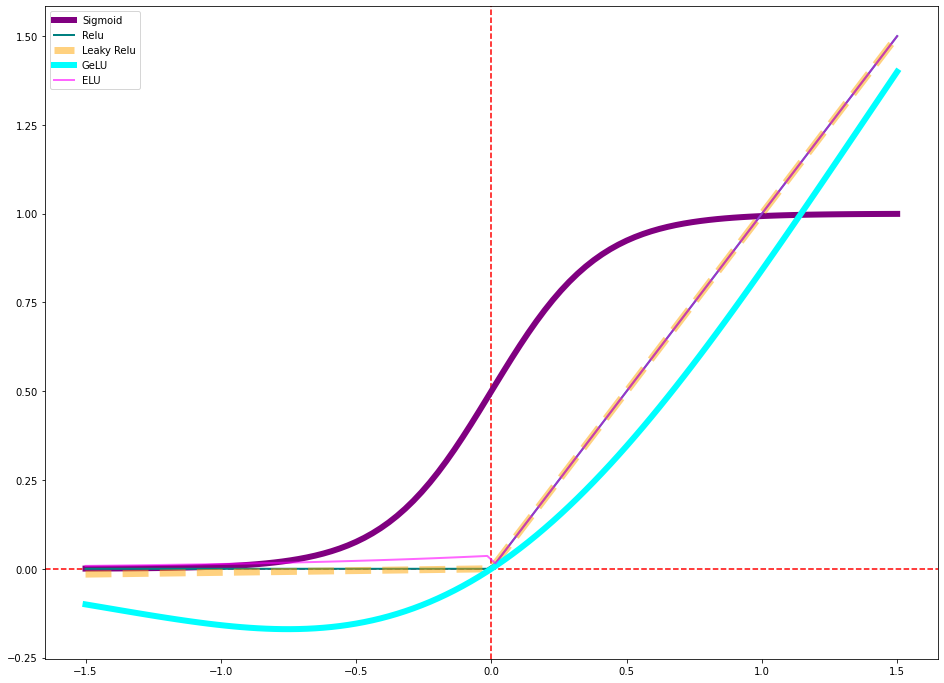

In [118]:
t = np.linspace(-1.5, 1.5, 100)
fig = plt.figure(figsize=(16,12))
sigm_t = 1.0/(1+np.exp(-5*t))
plt.axvline(x=0, linestyle='--', color="red")
plt.axhline(y=0, linestyle='--', color="red")
plt.plot(t, sigm_t, color="purple",  linewidth=6, label='Sigmoid')
# ReLU
relu_t = np.maximum(0, t)
plt.plot(t, relu_t, color="teal",  linewidth=2, label='Relu')
# Leaky Relu
lrelu_t = np.where(t >0, t ,0.01*t)
plt.plot(t, lrelu_t, color="orange",  linewidth=7, alpha = 0.5, linestyle='--', label='Leaky Relu')
# GeLU
from scipy.stats import norm
gelu_t = norm.cdf(t)*t
plt.plot(t, gelu_t, color="cyan",linewidth=6, label='GeLU')
# ELU
elu_t = np.where(t > 0, t , 0.1 * np.exp(t - 1))
plt.plot(t, elu_t, color="magenta",linewidth=2, alpha=0.6, label='ELU')
plt.legend()

# Lineáris egységek

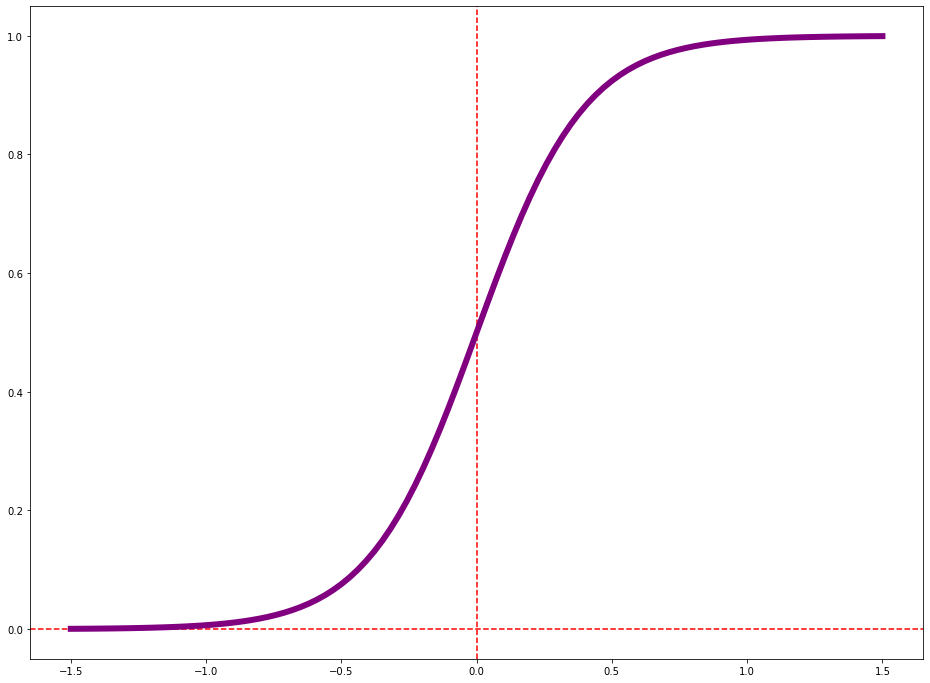

In [93]:
fig = plt.figure(figsize=(16,12))
sigm_t = 1.0/(1+np.exp(-5*t))
plt.axvline(x=0, linestyle='--', color="red")
plt.axhline(y=0, linestyle='--', color="red")
plt.plot(t, sigm_t, color="purple",  linewidth=6)
plt.plot(t,)